In [1]:
import pandas as pd

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int:
<br>*не работает, держу в курсе*

df['User_Score'] = df['User_Score'].astype('float64')<br>
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')<br>
df['User_Count'] = df['User_Count'].astype('int64')<br>
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
print(df.shape, '\n')
print(df.columns)

(16719, 16) 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


Данные есть не для всех игр, поэтому давайте оставим только те записи, в которых нет пропусков, с помощью метода dropna:

In [6]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [7]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null int64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null int64
User_Score         6825 non-null float64
User_Count         6825 non-null int64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB
None


Для удобства оставим только те признаки, которые мы будем в дальнейшем использовать:

In [8]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,87.0,80,8.4,594,E
11,Mario Kart DS,DS,2005,Racing,23.21,91.0,64,8.6,464,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.81,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


-------
------
--------

Для примера построим график продаж видео игр в различных странах в зависимости от года. <br>Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам:

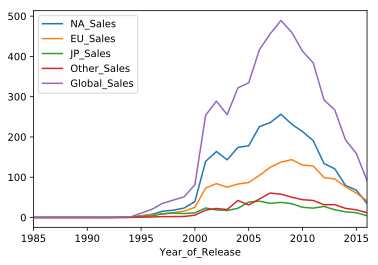

In [9]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

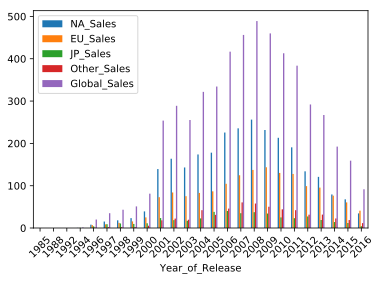

In [10]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

------------
------
-------

Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. <br>Seaborn содержит более адекватные дефолтные настройки оформления графиков. <br>Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

pair plot (scatter plot matrix) - эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

На диагонали матрицы графиков расположены (гистограммы) распределений признака.
<br>Остальные графики — это обычные scatter plots для соответствующих пар признаков.

*Т.к. после построения матрицы все тормозит, то мы посмотрим на ее картинку:*

In [11]:
#cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
#sns_plot = sns.pairplot(df[cols], height=2, diag_kind="kde")
#sns_plot.savefig('pairplot.png')

<img src="pairplot.png">

С помощью seaborn можно построить и распределение через dist plot. <br>По умолчанию на графике отображается гистограмма и kernel density estimation.

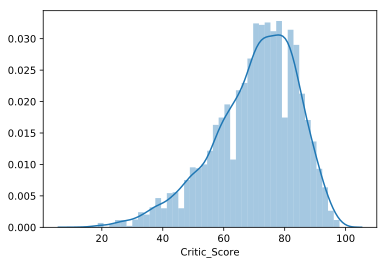

In [12]:
sns.distplot(df['Critic_Score'])

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. <br>Посмотрим на то, как связаны между собой оценка критиков Critic_Score и оценка пользователя User_Score.

*Т.к. после построения матрицы опять все тормозит, то мы посмотрим на ее картинку:*

In [13]:
#sns_plot = sns.jointplot(df['Critic_Score'], df['User_Score'])
#sns_plot.savefig('jointplot.png')

<img src="jointplot.png">

Еще один полезный тип графиков — это box plot. <br>Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ:

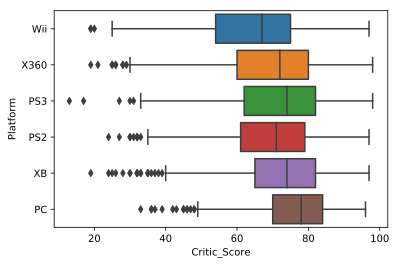

In [14]:
top_platforms = df['Platform'].value_counts().sort_values(ascending = False).head(6).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df['Platform'].isin(top_platforms)], orient="h")

Box plot состоит из коробки, усиков и точек. Коробка показывает интерквартильный размах распределения, <br>то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.
<br>*Интерквартильный размах - интервал значений признака, содержащий центральные 50% наблюдений выборки, <br>т.е. интервал между 25-м и 75-м процентилями.*

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток. 
<br>Точками на графике обозначаются выбросы (outliers).

Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. <br>Визуализируем суммарные продажи игр по жанрам и игровым платформам:

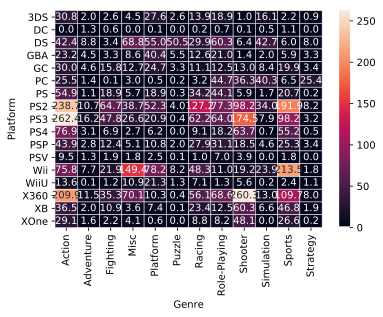

In [15]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

------------
------------
----------

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.


Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

In [16]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

В plotly строится визуализация объекта Figure, который состоит из данных <br>(массив линий, которые в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout.

Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. Поскольку обычно это функциональность не нужна, то лучше скрывать ее для предотвращения случайных нажатий.

Построим line plot с динамикой числа вышедших игр и их продаж по годам:

In [17]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Посмотрим также на рыночную долю игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке. <br>Для этого построим bar chart:

In [18]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В plotly можно построить и box plot. 
<br>Рассмотрим распределения оценок критиков в зависимости от жанра игры:

In [19]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df['Genre'].unique():
    data.append(
        go.Box(y=df[df['Genre']==genre]['Critic_Score'], name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

--------------
--------
------